<p>
  <center><img src="../assets/thakaa_logo.png" width="400" height="200"></center>
</p>

<p>
<br>
  <center><img src="../assets/artwork.png" width="500" height="200"></center>
</p>
<br>
<h1 style='text-align: center; font-size: 2.5em;'> معسكر ذكاء: إصلاح وتحسين نماذج تعلم الآلة </h1>
<!-- <font size="+2" style='text-align: center;'> تعلّم كيف تكتشف البيانات وتطوّر نماذج تعلّم الآلة </h2> -->
<div style="text-align: center; font-family: Arial; font-size: 1.75em;">تعلّم مجموعة من المفاهيم والأدوات الأساسية لمعالجة المشاكل في نماذج تعلم الآلة وتحسين أدائها</div>

# Challenge#4: Help the K-nearst neighbors algorithms to obtain better performance on this calssification task

## Load libraries

In [1]:
# reload modules before executing user code
%load_ext autoreload
# reload all modules every time before executing Python code
%autoreload 2
# render plots in notebook
%matplotlib inline

In [2]:
from numpy import exp
from numpy.random import randn
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import pandas as pd
from numpy import mean
from numpy import std

## Read the sonar dataset 

In [3]:
# load dataset
df_sonar = pd.read_csv('../data/sonar.csv')
df_sonar.head()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock


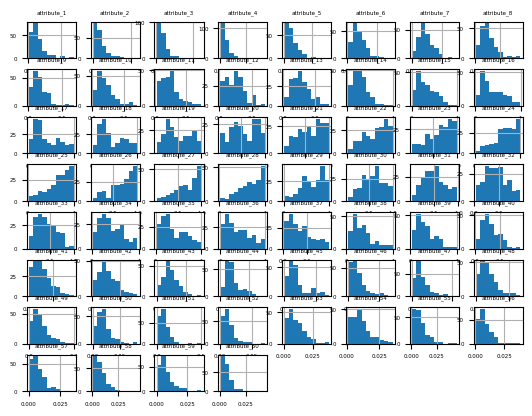

In [4]:
# histograms of the variables
fig = df_sonar.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
plt.show()

## Data preprocessing 

In [5]:
data = df_sonar.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

## Fit a K-nearst neighbor classifier

In [6]:
# define and configure the model
model = KNeighborsClassifier()

## Evaluation 

In [7]:
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.797 (0.073)


## Apply a power transform featurewise to make data more Gaussian-like. 

In [8]:
# retrieve just the numeric input values
numeric_data = data[:, :-1]
# perform a yeo-johnson transform of the dataset
pt = PowerTransformer(method='yeo-johnson')
transformed_data = pt.fit_transform(numeric_data)
# convert the array back to a dataframe
df_sonar_transformed = pd.DataFrame(transformed_data, columns=df_sonar.columns[:-1])
df_sonar_transformed

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60
0,-0.275592,0.270400,0.291419,-0.982829,0.680848,0.077254,0.667974,0.554828,1.261778,0.262281,...,0.886822,-1.714520,-0.540200,0.882627,-0.107066,1.499641,1.633890,0.400350,0.502761,-0.776736
1,1.093320,0.801622,1.347540,0.735530,1.048217,2.028301,1.450303,1.955298,1.382871,0.814053,...,-0.168191,-0.487283,-0.088541,-0.924571,0.312654,1.715447,1.265764,-0.397173,-0.337201,-0.334828
2,0.164352,0.967858,1.706388,1.454208,0.716427,1.788322,1.731436,2.076448,2.145065,2.108350,...,-1.528076,1.260374,0.989360,-0.005498,1.376513,2.058982,2.181153,1.455415,0.591789,0.612764
3,-1.191697,-0.733065,0.883488,-0.992975,-1.359821,-1.413729,-0.057137,0.135456,-1.320846,-0.563375,...,0.956393,0.107221,-1.181021,0.778028,0.150290,0.047176,-0.399785,-0.535400,-0.674439,1.306602
4,1.812744,1.173239,0.473188,-0.161826,-0.112767,-0.657618,0.140947,1.367785,1.492734,1.594884,...,0.186054,-1.613589,-0.770133,0.157606,0.572627,-1.670035,0.159755,-0.424272,0.788511,0.938201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,-0.379109,0.166273,-0.902331,-1.138435,-0.686635,1.100116,1.306537,0.661465,0.746475,0.691188,...,0.644591,0.034559,0.064670,1.283046,-1.072419,0.610239,-0.004642,0.909526,1.688352,1.744319
204,0.522051,-1.194353,-0.235241,0.403843,0.295163,0.022315,-0.261079,-0.257467,-0.633402,0.297622,...,-1.220044,-0.931213,-0.019420,0.590176,-0.302497,-0.189937,-0.894913,-0.896528,-0.084993,0.348624
205,1.316126,0.521191,-0.833883,-0.579824,-0.825389,0.415836,0.223178,-0.006945,-0.325909,0.583654,...,0.175313,0.603645,-1.353310,-0.857491,-0.325142,0.385757,1.265764,1.198513,0.249830,-0.816620
206,0.412116,0.195965,0.502379,0.527823,-1.513425,0.712918,0.557277,-0.090453,0.421651,0.454949,...,-1.371202,-0.451573,-0.947234,0.468771,-0.986346,-0.976525,-0.894913,0.302618,-0.795986,-0.201554


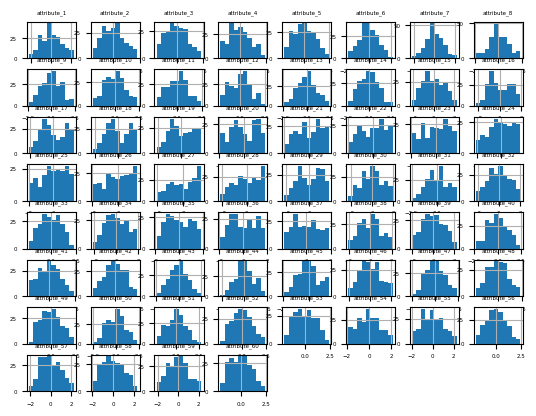

In [9]:
# histograms of the variables
fig = df_sonar_transformed.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
plt.show()

In [10]:
# load dataset
url='https://drive.google.com/uc?id=18wwc3swPv_ylRuzLqlqAOwucluz2qI8E'
dataset = pd.read_csv(url)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
power = PowerTransformer(method='yeo-johnson')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('p', power), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.808 (0.082)
